# <span style="color:red"> Lecture 6
---

### Abstract
In this lecture we use the 1D Ising Model to simulate a system of $50$ spins that can interact only with their nearest neighbors. We choose to consider $J = 1$, $k_B = 1$ and $\mu_B = 1$. 

Since the model is solvable, the goal is to confront measures of four quantities obtained through the simulation, i.e. internal energy per spin $U/N$, heat capacity $C$, magnetization per spin $M/N$ and susceptibility $\chi$,  with the exact results given by the theory. Each of these quantities will be measured at different temperatures, spanning from $T = 0.5$ to $T = 2.0$, and with external magnetic field $h = 0$, with exception for $M/N$, in which case the external magnetic field will be set to $h = 0.02$.

Lastly, we will adopt two different methods to simulate the evolution of the system, i.e. the Metropolis algorithm and the Gibbs sampling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
J = 1.0
Ns = 50

def observables(T):
    
    beta = 1/T
    b = beta
    th = np.tanh(J/T)
    thN= th**Ns
    ch = 1/th
    h=0.02
    
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    
    energy = -J*( th + ch*thN )/( 1 + thN )
    heat = ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
    mag = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
            + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    chi = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
    
    return np.array([energy, heat, mag, chi])

### Exercise 06.1

In [3]:
files = ["ene", "heat", "mag", "chi"]
metro, gibbs = {}, {}
    
for file in files:
    metro[file] = pd.read_csv(f"../data/Metro/Multi_sim/multi.{file}.dat", sep="\t").drop(["Block", "Mean"], axis=1)
    gibbs[file] = pd.read_csv(f"../data/Gibbs/Multi_sim/multi.{file}.dat", sep="\t").drop(["Block", "Mean"], axis=1)

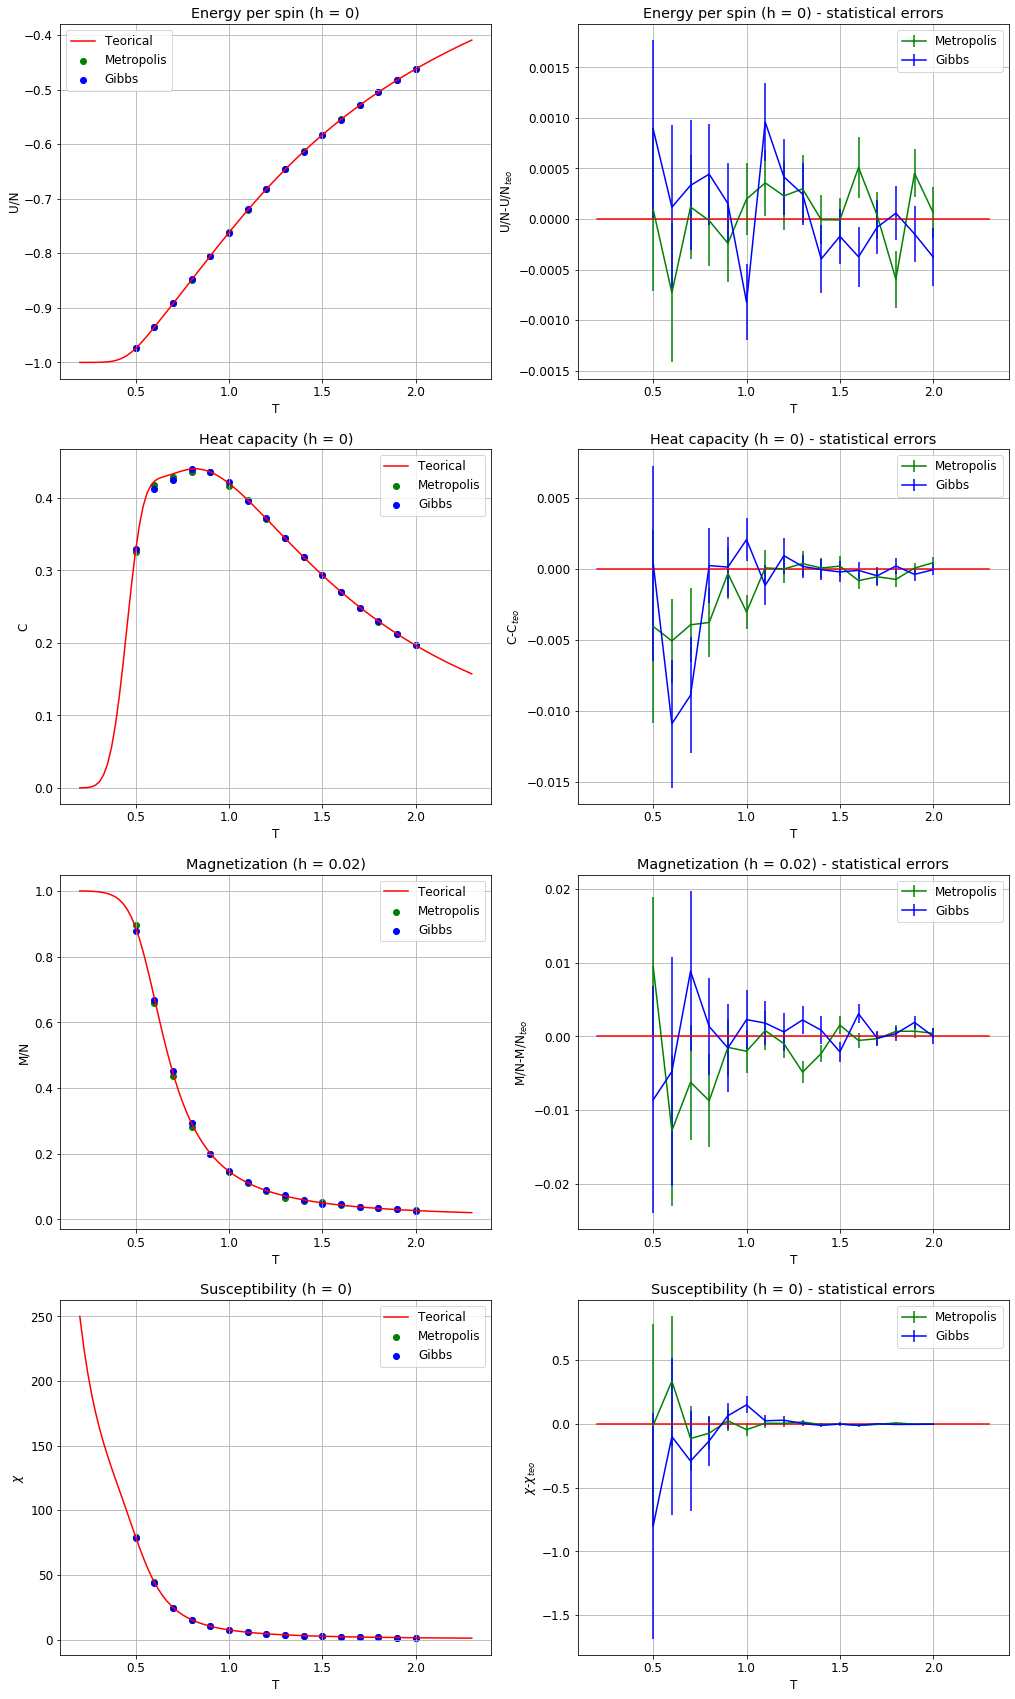

In [4]:
titles = ["Energy per spin (h = 0)", "Heat capacity (h = 0)", "Magnetization (h = 0.02)", "Susceptibility (h = 0)"]
labels = ["U/N", "C", "M/N", r"$\chi$"]
T = np.linspace(0.2, 2.3, num=100)
obs = observables(T)
obs_errors = observables(np.linspace(0.5, 2.0, num=16))
    
plt.rcParams.update({'font.size':12})
fig  = plt.subplots(figsize=(17, 30))

for i in range(len(files)):
    file = files[i]
    title = titles[i]
    label = labels[i]
    pd_metro = metro[file]
    pd_gibbs = gibbs[file]
    
    # observables
    ob = obs[i]
    ax = plt.subplot(4, 2, 2*i + 1)
    ax.set_title(title)
    ax.scatter(pd_metro["Temperature"], pd_metro["Prog_mean"], color="g", label="Metropolis")
    ax.scatter(pd_gibbs["Temperature"], pd_gibbs["Prog_mean"], color="b", label="Gibbs")
    ax.plot(T, ob, color="r", label="Teorical")
    ax.set_xlabel("T")
    ax.set_ylabel(label)
    ax.legend()
    ax.grid()
    
    # errors
    ob_error = obs_errors[i]
    ax = plt.subplot(4, 2, 2*i + 2)
    ax.set_title(title+" - statistical errors")
    ax.errorbar(pd_metro["Temperature"], pd_metro["Prog_mean"]-ob_error, yerr=pd_metro["Error"], color="g", label="Metropolis")
    ax.errorbar(pd_gibbs["Temperature"], pd_gibbs["Prog_mean"]-ob_error, yerr=pd_gibbs["Error"], color="b", label="Gibbs")
    ax.plot([0.2, 2.3], [0, 0], color="r")
    ax.set_xlabel("T")
    ax.set_ylabel(label+"-"+label+r"$_{teo}$")
    ax.legend()
    ax.grid()

First of all, we can see that there is no significative difference between the two sampling methods (Gibbs and Metropolis) and that both oh them provide measures in good agreement with the analytic solutions.

Moreover, we can observe that the lower the temperature gets, the harder is for the algorithm to converge to the right value (this is especially true for the Gibbs sampling method).